# Fitting a Stepwise Linear Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

sns.set_style("whitegrid")

The DataFrame data has been split into a training set, dataTrain, and a test set, dataTest.

In [2]:
data = pd.read_excel("./data/dataMulti.xlsx", sheet_name='data').dropna(axis=0)
X, y = data.iloc[:, :3], data['Y']
data_train = pd.read_excel("./data/dataMulti.xlsx", sheet_name='dataTrain').dropna(axis=0)
X_train, y_train = data_train.iloc[:, :3], data_train['Y']
data_test = pd.read_excel("./data/dataMulti.xlsx", sheet_name='dataTest').dropna(axis=0)
X_test, y_test = data_test.iloc[:, :3], data_test['Y']
data.head()

,X1,X2,X3,Y
0,4732,18.5,70,9.0
1,4615,14.0,70,10.0
2,4376,15.0,70,10.0
3,4382,13.5,70,11.0
4,3940,13.2,76,13.0


Create polynomial features.

In [3]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_train_poly = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out())
X_train_poly = X_train_poly[["1", "X1",	"X2", "X3", "X1^2", "X2^2", "X3^2"]]
X_train_poly.head()

,1,X1,X2,X3,X1^2,X2^2,X3^2
0,1.0,4732.0,18.5,70.0,22391824.0,342.25,4900.0
1,1.0,4615.0,14.0,70.0,21298225.0,196.00,4900.0
2,1.0,4382.0,13.5,70.0,19201924.0,182.25,4900.0
3,1.0,4055.0,12.0,76.0,16443025.0,144.00,5776.0
4,1.0,3870.0,15.0,76.0,14976900.0,225.00,5776.0


We can create and fit an [Ordinary Least Squares (OLS)](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels-regression-linear-model-ols) regressor to obtain an [statistical summary](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.summary.html#statsmodels-regression-linear-model-olsresults-summary) of the regression results.

In [4]:
regressor = sm.OLS(y_train, X_train_poly)
results = regressor.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     75.79
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           7.12e-26
Time:                        20:18:19   Log-Likelihood:                -157.26
No. Observations:                  66   AIC:                             328.5
Df Residuals:                      59   BIC:                             343.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            244.5896    116.692      2.096      0.0

Here we are concerned about the column “P > |t|”. Quoting some technical explanations from the [UCLA Institute for Digital Research and Education](https://stats.idre.ucla.edu/stata/output/regression-analysis/), this column gives the 2-tailed p-value used in testing the null hypothesis.

“Coefficients having p-values less than alpha are statistically significant. For example, if you chose alpha to be 0.05, coefficients having a p-value of 0.05 or less would be statistically significant (i.e., you can reject the null hypothesis and say that the coefficient is significantly different from 0).”

In other words, we would generally want to drop variables with a p-value greater than 0.05.

In [5]:
X_train_poly.drop(columns=['X2'], inplace=True)

regressor = sm.OLS(y_train, X_train_poly)
results = regressor.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     91.39
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           9.59e-27
Time:                        20:18:19   Log-Likelihood:                -157.61
No. Observations:                  66   AIC:                             327.2
Df Residuals:                      60   BIC:                             340.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            239.0025    116.113      2.058      0.0

In [6]:
X_train_poly.drop(columns=['X2^2'], inplace=True)

regressor = sm.OLS(y_train, X_train_poly)
results = regressor.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     114.4
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.26e-27
Time:                        20:18:19   Log-Likelihood:                -158.05
No. Observations:                  66   AIC:                             326.1
Df Residuals:                      61   BIC:                             337.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            259.3342    113.756      2.280      0.0

There are no more p-values greater than 0.05. We can now fit a linear regression model after dropping the variables X2, X2^2.

In [7]:
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

LinearRegression()

In [8]:
X_test_poly = poly.transform(X_test)
X_test_poly = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out())
X_test_poly = X_test_poly[X_train_poly.columns]

y_pred = regressor.predict(X_test_poly)
print("R^2:", regressor.score(X_test_poly, y_test))

R^2: 0.8816902216736121


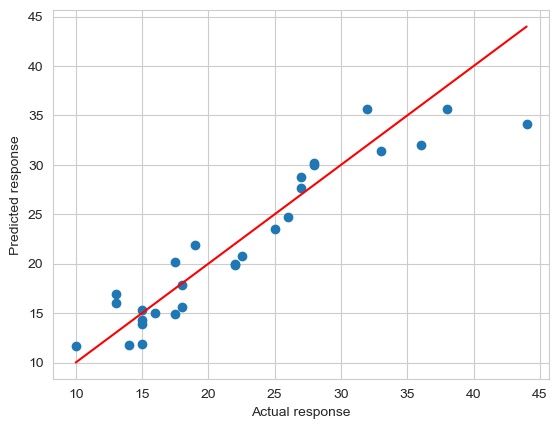

In [9]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
plt.xlabel("Actual response")
plt.ylabel("Predicted response")
plt.show()